<a href="https://colab.research.google.com/github/Nkosingiphile18/CodSoft-Internship/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sales Prediction**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])
df.head()


Saving advertising.csv to advertising (4).csv


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.dropna()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.nunique()

,0
TV,190
Radio,167
Newspaper,172
Sales,121


**EXPLORATORY DATA ANALYSIS**

In [ ]:
correlation_matrix = df.corr()
correlation_matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


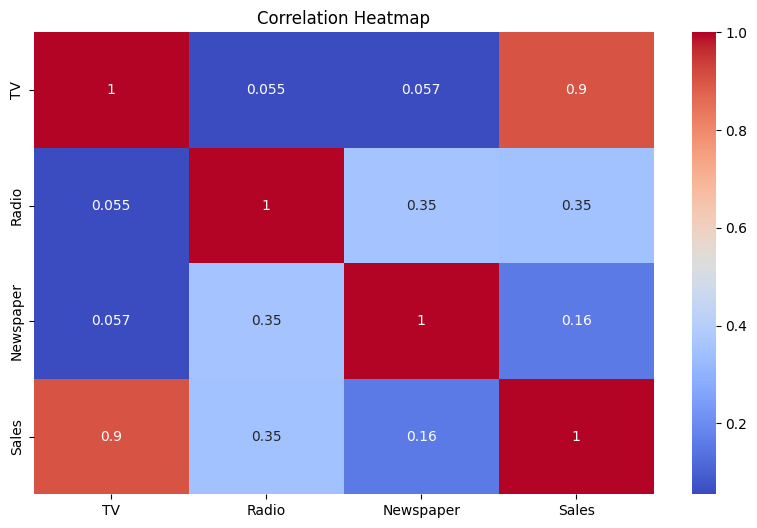

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

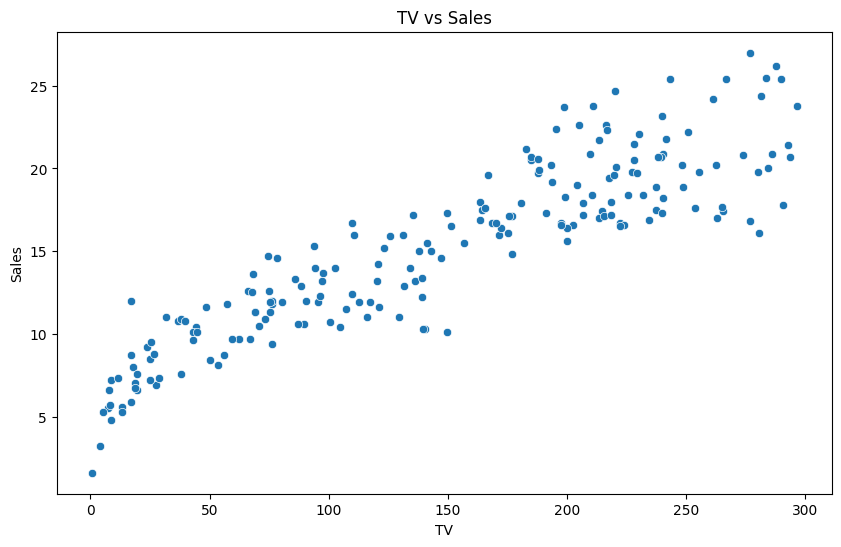

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('TV vs Sales')
plt.show()

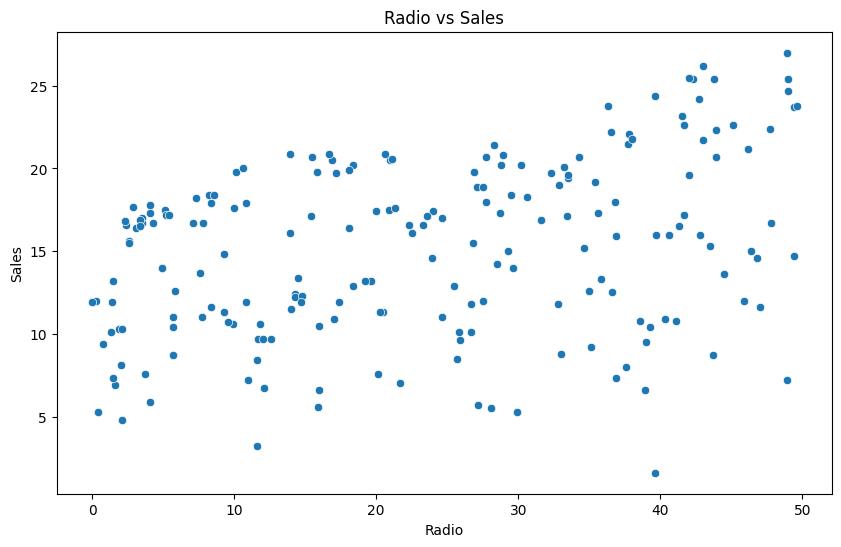

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title('Radio vs Sales')
plt.show()

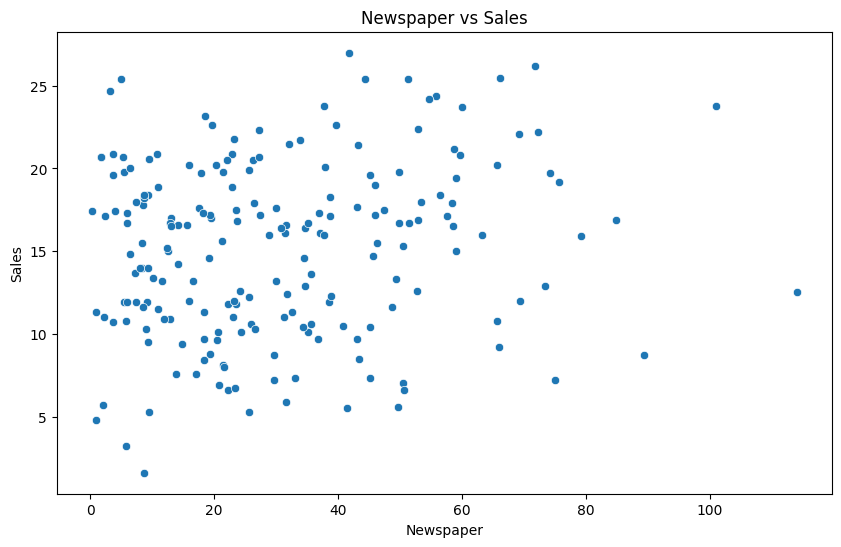

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title('Newspaper vs Sales')
plt.show()

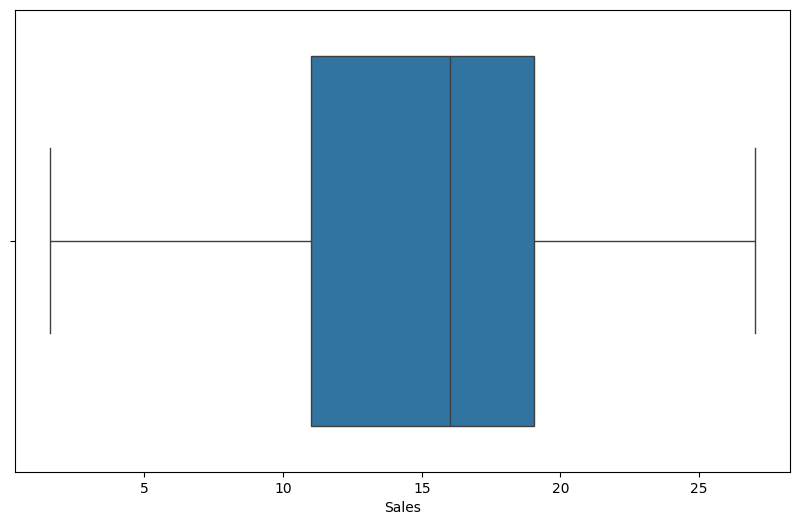

In [ ]:
sales = df['Sales']
plt.figure(figsize=(10, 6))
sns.boxplot(x=sales)
plt.show()


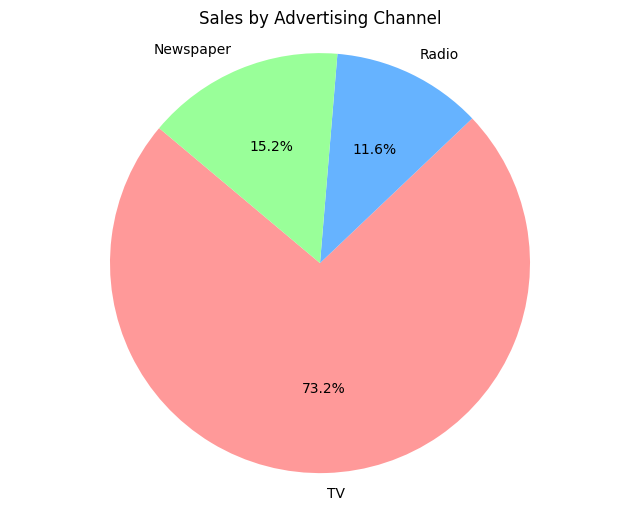

In [ ]:
features = ['TV', 'Radio', 'Newspaper']
labels = df[features]
total_sales = labels.sum()
plt.figure(figsize=(8, 6))
plt.pie(total_sales, labels=total_sales.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'],startangle=140)
plt.title('Sales by Advertising Channel')
plt.axis('equal')
plt.show()

**Linear Regression Model**

In [ ]:
# Split data into train and test set
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display linear regression model coefficients using statsmodels
X_train_sm = sm.add_constant(X_train_scaled)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

Mean Squared Error: 2.9077569102710927
R-squared: 0.9059011844150825
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     468.7
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           8.51e-78
Time:                        22:21:07   Log-Likelihood:                -305.78
No. Observations:                 160   AIC:                             619.6
Df Residuals:                     156   BIC:                             631.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------